### Applied Machine Learning 2a

##### Date: February 19 2020
##### Author: Jung Ah Shin 
##### Data source: https://www.openml.org/d/31

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline


In [ ]:
dat = fetch_openml('credit-g', as_frame=True)

### 1.1 Determine which features are continuous and which are categorical.
Categorical: checking_status, credit_history, purpose, savings_status, employment, personal_status, other_parties, property_magnitude, other_payment_plans, housing, job, own_telephone, foreign_worker

Continuous: duration, credit_amount, installment_commitment, residence_since, age, existing_credits, num_dependents

In [ ]:
dat.data.dtypes

checking_status           category
duration                   float64
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment     float64
personal_status           category
other_parties             category
residence_since            float64
property_magnitude        category
age                        float64
other_payment_plans       category
housing                   category
existing_credits           float64
job                       category
num_dependents             float64
own_telephone             category
foreign_worker            category
dtype: object

### 1.2 Visualize the univariate distribution of each continuous feature, and the distribution of the target

In [ ]:
df = dat.data 
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [ ]:
df.columns = ['checking_status', 'duration', 'credit_history', 'purpose', 
             'credit_amount', 'savings_status', 'employment', 'installment_commitment',
              'personal_status', 'other_parties', 'residence_since', 'property_magnitude',
              'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 
              'num_dependents', 'own_telephone', 'foreign_worker']


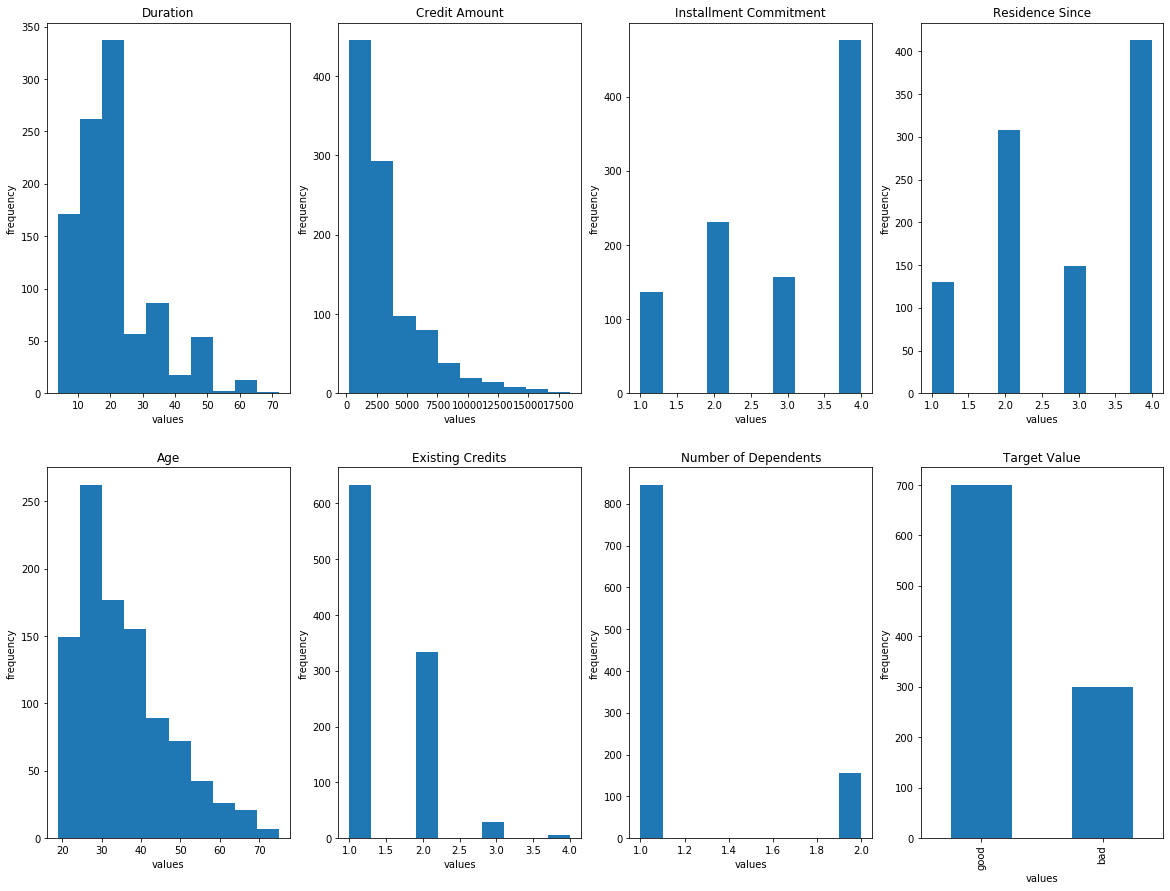

In [ ]:
fig,ax = plt.subplots(2,4, figsize=(20,15)) 
ax[0,0].hist(df.duration)
ax[0,1].hist(df.credit_amount)
ax[0,2].hist(df.installment_commitment)
ax[0,3].hist(df.residence_since)
ax[1,0].hist(df.age)
ax[1,1].hist(df.existing_credits)
ax[1,2].hist(df.num_dependents)

dat.target.value_counts().plot(ax=ax[1,3], kind='bar')

for i in range(2):
    for j in range(4):
        ax[i,j].set_ylabel('frequency')
        ax[i,j].set_xlabel('values')
ax[0,0].title.set_text('Duration')
ax[0,1].title.set_text('Credit Amount')
ax[0,2].title.set_text('Installment Commitment')
ax[0,3].title.set_text('Residence Since')
ax[1,0].title.set_text('Age')
ax[1,1].title.set_text('Existing Credits')
ax[1,2].title.set_text('Number of Dependents')
ax[1,3].title.set_text('Target Value')
  

### 1.3 Split data into training and test set. 

In [ ]:
X = df.iloc[:, 0:20]
y = dat.target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
X_train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
253,no checking,24.0,delayed previously,furniture/equipment,4151.0,100<=X<500,1<=X<4,2.0,male single,none,3.0,life insurance,35.0,none,own,2.0,skilled,1.0,none,yes
667,no checking,48.0,all paid,business,3609.0,<100,1<=X<4,1.0,female div/dep/mar,none,1.0,real estate,27.0,stores,own,1.0,skilled,1.0,none,yes
85,no checking,12.0,critical/other existing credit,business,1412.0,<100,1<=X<4,4.0,female div/dep/mar,guarantor,2.0,real estate,29.0,none,own,2.0,high qualif/self emp/mgmt,1.0,yes,yes
969,<0,11.0,critical/other existing credit,new car,3939.0,<100,1<=X<4,1.0,male single,none,2.0,real estate,40.0,none,own,2.0,unskilled resident,2.0,none,yes
75,<0,12.0,critical/other existing credit,used car,1526.0,<100,>=7,4.0,male single,none,4.0,no known property,66.0,none,for free,2.0,high qualif/self emp/mgmt,1.0,none,yes


In [ ]:
categorical = X_train.dtypes == 'category'

# Split continuous and categorical variables (for preprocessing)
X_train_cont = X_train[X_train.columns[~categorical]]
X_train_cat = X_train[X_train.columns[categorical]]

In [ ]:
cat_dat = ['checking_status','credit_history', 'purpose', 
              'savings_status', 'employment','personal_status', 
               'other_parties', 'property_magnitude','other_payment_plans',
               'housing', 'job','own_telephone', 'foreign_worker']

#Scale categorical
X_train_onehot = pd.get_dummies(X_train, columns=cat_dat)
# ce = OneHotEncoder().fit(X_train_cat)
# X_train_cat_scaled = ce.transform(X_train_cat).toarray()
# EXTRA:'purpose_other', personal_status_female single'


In [ ]:
#evaluate an initial LogisticRegression model with an training/validation split.

logreg = LogisticRegression()
scores = cross_val_score(logreg, X_train_onehot, y_train, cv=5)

print("Initial LogisticRegression model: ","{0:.3f}".format(np.mean(scores)))


Initial LogisticRegression model:  0.755


### 1.4 Use ColumnTransformer and pipeline to encode categorical variables. 

Evaluate Logistic Regression, linear support vector machines and nearest neighbors using cross-validation. How different are the results? How does scaling the continuous features with StandardScaler influence the results?

In [ ]:
#With Standard Scaler
preprocess = make_column_transformer(
(StandardScaler(), ~categorical),
(OneHotEncoder(), categorical))

#Logistic Regression
logreg_model = make_pipeline(preprocess, LogisticRegression())
log_reg_scores = cross_val_score(logreg_model, X_train, y_train)

#Linear Support Vector Machines
svm_model = make_pipeline(preprocess, LinearSVC())
svm_scores = cross_val_score(svm_model, X_train, y_train)

#Nearest Neighbors
knn_model = make_pipeline(preprocess, KNeighborsClassifier())
knn_scores = cross_val_score(knn_model, X_train, y_train)

print(" Logistic Regression: ", "{0:.3f}".format(np.mean(log_reg_scores)), "\n", 
      "Linear Support Vector Machines: ", "{0:.3f}".format(np.mean(svm_scores)), "\n"
     ,"Nearest Neighbors: ", "{0:.3f}".format(np.mean(knn_scores)))


 Logistic Regression:  0.759 
 Linear Support Vector Machines:  0.755 
 Nearest Neighbors:  0.724


After using ColumnTransformer and pipeline, the results for all three models are similar to one another. Logistic regression has a mean cross validation score of 0.759, which is the highest among the three models, and Nearest Neighbors has a mean cross validation of 0.724, which is the lowest.

In [ ]:
#Without Standard Scaler
preprocess1 = make_column_transformer(
(OneHotEncoder(), categorical))

#Logistic Regression
logreg_model = make_pipeline(preprocess1, LogisticRegression())
log_reg_scores = cross_val_score(logreg_model, X_train, y_train)

#Linear Support Vector Machines
svm_model = make_pipeline(preprocess1, LinearSVC())
svm_scores = cross_val_score(svm_model, X_train, y_train)

#Nearest Neighbors
knn_model = make_pipeline(preprocess1, KNeighborsClassifier())
knn_scores = cross_val_score(knn_model, X_train, y_train)

print(" Logistic Regression without StandardScaler: ", "{0:.3f}".format(np.mean(log_reg_scores)), "\n", 
      "Linear Support Vector Machines without StandardScaler: ", "{0:.3f}".format(np.mean(svm_scores)), "\n"
     ,"Nearest Neighbors without StandardScaler: ", "{0:.3f}".format(np.mean(knn_scores)))

 Logistic Regression without StandardScaler:  0.749 
 Linear Support Vector Machines without StandardScaler:  0.753 
 Nearest Neighbors without StandardScaler:  0.736


The results above does not include the scaling of the continuous features using StandardScaler. Interestingly, not scaling the continuous features do not have a significant impact on the scores. Compared to the scaled version, Logistic Regression had a lower score, and nearest neighbors improved without scaling. Linear SVM stayed almost the same. 

### 1.5 Tune the parameters using GridSearchCV. Do the results improve? 

In [ ]:
pipe = Pipeline([('scaler', preprocess),
                ('regressor',LogisticRegression())]) #placeholder

param_grid = [{'regressor': [LogisticRegression()],
              'regressor__C': [0.001, 0.01, 0.1, 1, 10]},
             {'regressor': [LinearSVC()],
             'regressor__C': [0.001, 0.01, 0.1, 1, 10]},
              {'regressor': [KNeighborsClassifier()],
             'regressor__n_neighbors': [2,4,6,8,10]}]

grid = GridSearchCV(pipe, param_grid = param_grid, return_train_score=True)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

print(grid.best_params_)
results = grid.cv_results_

# #Logistic Regression
# logreg_grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, 
#                    return_train_score=True)

# #Linear Support Vector Machines
# svm_grid = GridSearchCV(LinearSVC(), param_grid=param_grid, cv=5, 
#                    return_train_score=True)
# #Nearest Neighbors
# knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, 
#                    return_train_score=True)


{'regressor': LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0), 'regressor__C': 0.1}


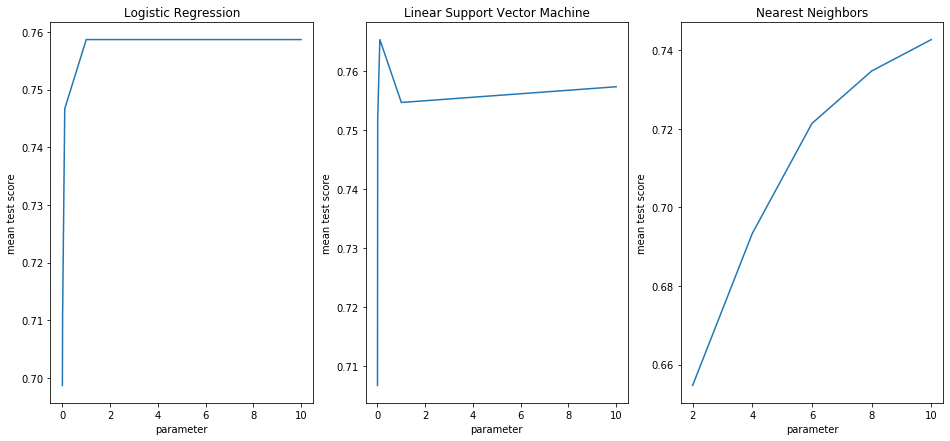

In [ ]:
results_df = pd.DataFrame.from_dict(results)

# param values and mean_test_score
fig1, ax1 = plt.subplots(1,3, figsize=(16,7))
ax1[0].plot(results_df.param_regressor__C[0:5], results_df.mean_test_score[0:5])
ax1[1].plot(results_df.param_regressor__C[5:10], results_df.mean_test_score[5:10])
ax1[2].plot(results_df.param_regressor__n_neighbors[10:], results_df.mean_test_score[10:]);

for i in range(3):
    ax1[i].set_xlabel('parameter')
    ax1[i].set_ylabel('mean test score')
    if i == 0:
        ax1[i].title.set_text('Logistic Regression')
    elif i== 1:
        ax1[i].title.set_text('Linear Support Vector Machine')
    else:
        ax1[i].title.set_text('Nearest Neighbors')


For logistic regression, Linear SVM and Nearest Neighbors, the values seem to improve for larger parameters. However, the values seem to stay relatively the same compared to the previous methods.

### 1.6 Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters that are found change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

In [ ]:
# Change to 'kfold' with shuffling
kfold = KFold(n_splits=5, shuffle=True)

grid2 = GridSearchCV(pipe, param_grid = param_grid, return_train_score=True, cv=kfold)
grid2.fit(X_train, y_train)
grid2.score(X_test, y_test)

#print(grid2.best_params_)
results2 = grid2.cv_results_

# Change the random seed of the shuffling
kfold_randomseed = KFold(n_splits=5, shuffle=True, random_state = random.seed(42))
grid3 = GridSearchCV(pipe, param_grid = param_grid, return_train_score=True, cv=kfold_randomseed)
grid3.fit(X_train, y_train)
grid3.score(X_test, y_test)

#print(grid3.best_params_)
results3 = grid3.cv_results_

# Change the random state of the split into training and test

X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X,y, random_state=2)
kfold_randomsplit = KFold(n_splits=5, shuffle=False, random_state = None)

grid4 = GridSearchCV(pipe, param_grid = param_grid, return_train_score=True, cv=kfold_randomsplit)
grid4.fit(X_train_random, y_train_random)
grid4.score(X_test_random, y_test_random)

#print(grid4.best_params_)
results4 = grid4.cv_results_

print(np.mean(grid2.score(X_test, y_test)), np.mean(grid3.score(X_test, y_test)), np.mean(grid4.score(X_test_random, y_test_random)))



0.728 0.768 0.724


Based on the results, the kfold shuffling with a different random seed has the highest mean test score, and changing the random state of the split into training and test had the lowest mean test score. However, these values are very similar to one another. Parameters also do not seem to change significantly.

### 1.7 Visualize the 20 most important coefficients for LogisticRegression and Linear Support Vector Machines using hyper-parameters that performed well in the grid-search.

In [ ]:
pipelog = Pipeline([("Preprocessor", preprocess),
                   ("scaler", LogisticRegression(C=grid2.best_params_['regressor__C']))])
pipelog_model = pipelog.fit(X_train, y_train)
pipelog_coef = pipelog_model[-1].coef_[0] #last model, and take coefficient
best_pipelog_coef = np.argpartition(abs(pipelog_coef), -20)[-20:]
print(best_pipelog_coef)


pipesvm = Pipeline([("Preprocessor", preprocess),
                   ("scaler", LinearSVC(C=grid2.best_params_['regressor__C']))])
pipesvm_model = pipesvm.fit(X_train, y_train)
pipesvm_coef = pipesvm_model[-1].coef_[0] #last model, and take coefficient
best_pipesvm_coef = np.argpartition(abs(pipesvm_coef), -20)[-20:]
print(best_pipesvm_coef)


[52 50 18 33 60 46 45 41 40 25 24 23 20 15 12 11 10  8 59 30]
[13 30 24 23 25 46 21 20 40 50 17 15 41 12 55 11 10  8 59 18]


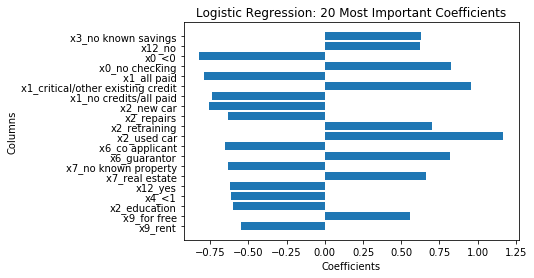

In [ ]:
columns_continuous = X_train[X_train.columns[~categorical]].columns
columns_categorical = pipelog.named_steps['Preprocessor'].transformers_[1][1].get_feature_names()
all_columns = np.array(list(columns_continuous) + list(columns_categorical))

ax = plt.barh(all_columns[best_pipelog_coef], pipelog_coef[best_pipelog_coef])
plt.title('Logistic Regression: 20 Most Important Coefficients')
plt.ylabel('Columns')
plt.xlabel('Coefficients');


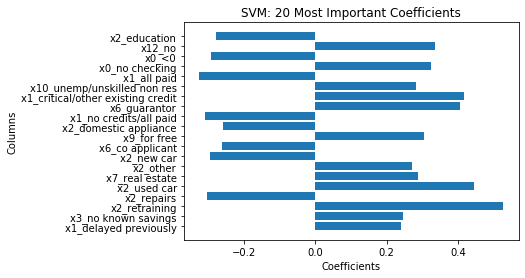

In [ ]:
ax = plt.barh(all_columns[best_pipesvm_coef], pipesvm_coef[best_pipesvm_coef])
plt.title('SVM: 20 Most Important Coefficients')
plt.ylabel('Columns')
plt.xlabel('Coefficients');
